In [6]:
from __future__ import annotations
import numpy as np
from dataclasses import dataclass
import matplotlib.pyplot as plt

In [7]:
width = 250

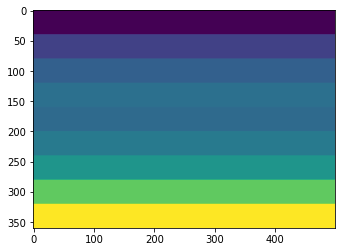

In [136]:
@dataclass
class Grid2D:
    x_size: int
    z_size: int
    x_step: int
    z_step: int

    def __post_init__(self):
        self.x_max = self.x_size * self.x_step
        self.z_max = self.z_size * self.z_step

        self.x = np.arange(0, self.x_max, self.x_step)
        self.z = np.arange(0, self.z_max, self.z_step)


grid = Grid2D(500, 360, 5, 5)


def generate_layercake(
    grid, init_vel, init_vel_std, incr_vel, incr_vel_std, max_vel=4000, rng=None
):
    if rng is None:
        rng = np.random.default_rng(None)

    dz_per_layer = 200 // grid.z_step
    layer_shape = (dz_per_layer, grid.x_size)

    perturb = rng.uniform(-init_vel_std, init_vel_std)
    init_layer_vel = init_vel + perturb

    init_layer = np.empty(layer_shape, dtype="float64")
    init_layer.fill(init_layer_vel)

    layers = [init_layer]
    for idx in range(8):
        prev_layer_vel = layers[idx][0][0]

        perturb = rng.uniform(-incr_vel_std, incr_vel_std)
        new_layer_vel = prev_layer_vel + incr_vel + perturb

        if new_layer_vel > max_vel:
            new_layer_vel = max_vel

        new_layer = np.empty(layer_shape, dtype="float64")
        new_layer.fill(new_layer_vel)

        layers.append(new_layer)

    layers = np.vstack(layers)

    assert layers.shape[0] == grid.z_size

    return layers


layercake = generate_layercake(grid, 1500, 150, 190, 380)
plt.imshow(layercake)